In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "BrainMRI",
    image_size = (256,256),
    batch_size = 5
    )

Found 96 files belonging to 2 classes.


In [3]:
class_names = dataset.class_names
class_names

['no', 'yes']

In [4]:
n_class = len(class_names)
n_class

2

In [5]:
len(dataset)

20

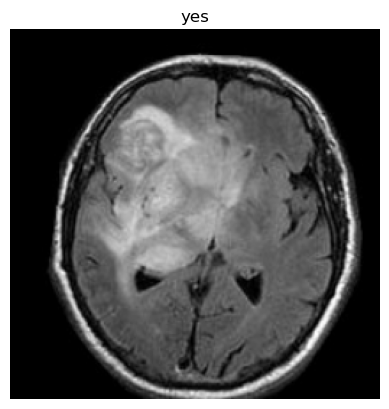

In [6]:
for image_batch, label_batch in dataset.take(10):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')

In [7]:
def data_partition(ds, train_size,shuffle=True, shuffle_size=1000):
    
    ds=dataset
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12) #if shuffle option is given in function. seed can be any number to make a constant shuffle
    
    train_data = dataset.take(int(len(dataset)*train_size))
    test_data = dataset.skip(len(train_data))
   
    
    return train_data, test_data

In [8]:
train_data, test_data =data_partition(dataset, 0.8, shuffle=True, shuffle_size=1000)
print("Size of training data", len(train_data))
print("Size of testing data", len(test_data))

Size of training data 16
Size of testing data 4


In [1]:
train_img=[]
train_y=[]

for image_batch, label_batch in train_data:
    for images in image_batch:
        train_imgX_train.append(images)
    for labels in label_batch:
        train_y.append(labels)
    plt.imshow(train_img[0].numpy().astype("uint8"))
    plt.title(class_names[train_y[0].numpy().astype("uint8")])
    plt.axis('off')

NameError: name 'train_data' is not defined

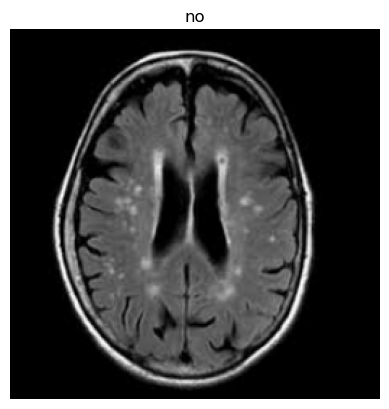

In [10]:
test_img=[]
test_y=[]

for image_batch, label_batch in test_data:
    for images in image_batch:
        test_img.append(images)
    for labels in label_batch:
        test_y.append(labels)
    plt.imshow(test_img[0].numpy().astype("uint8"))
    plt.title(class_names[test_y[0].numpy().astype("uint8")])
    plt.axis('off')

In [11]:
import numpy as np

X_train = np.array(train_img)
X_test = np.array(test_img)
y_train = np.array(train_y)
y_test = np.array(test_y)

In [12]:
X_train[1]

array([[[ 99.06821  ,  99.06821  ,  99.06821  ],
        [ 93.05859  ,  93.05859  ,  93.05859  ],
        [ 84.58203  ,  84.58203  ,  84.58203  ],
        ...,
        [171.28763  , 171.28763  , 171.28763  ],
        [160.50317  , 160.50317  , 160.50317  ],
        [230.92719  , 230.92719  , 230.92719  ]],

       [[ 96.01953  ,  96.01953  ,  96.01953  ],
        [ 89.33203  ,  89.33203  ,  89.33203  ],
        [ 80.47232  ,  80.47232  ,  80.47232  ],
        ...,
        [175.89154  , 175.89154  , 175.89154  ],
        [177.5427   , 177.5427   , 177.5427   ],
        [235.64731  , 235.64731  , 235.64731  ]],

       [[ 96.08322  ,  96.08322  ,  96.08322  ],
        [ 88.82388  ,  88.82388  ,  88.82388  ],
        [ 78.35361  ,  78.35361  ,  78.35361  ],
        ...,
        [115.8967   , 115.8967   , 115.8967   ],
        [117.097565 , 117.097565 , 117.097565 ],
        [228.83499  , 228.83499  , 228.83499  ]],

       ...,

       [[  6.       ,   6.       ,   6.       ],
        [  

In [13]:
# Normalize pixel values to between 0 and 1
X_test, X_train = X_test/255, X_train/255
X_train[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [14]:
y_train[0]

0

In [15]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)
train_labels_encoded = le.transform(y_train)

le.fit(y_test)
test_labels_encoded = le.transform(y_test)
test_labels_encoded

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [16]:
#One hot encode y values for neural network. 
from keras.utils import to_categorical
y_train_one_hot = to_categorical(train_labels_encoded)
y_test_one_hot = to_categorical(test_labels_encoded)
y_test_one_hot[0]

array([1., 0.], dtype=float32)

In [17]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
X_train, y_train, X_test, y_test = X_train, y_train_one_hot, X_test, y_test_one_hot
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

80
80
16
16


In [18]:
#Load model wothout classifier/fully connected layers
from keras.applications.vgg16 import VGG16

SIZE = 256

VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))
# Include_top=False to remove the classification layer that was trained on the ImageNet dataset
VGG_model.summary()              # Trainable parameters are same as total params

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [19]:
## Preprocessing input
from tensorflow.keras.applications.vgg16 import preprocess_input

X_train = preprocess_input(X_train) 
X_test = preprocess_input(X_test)

In [20]:
VGG_model.trainable = False  # set the model as not trainable
VGG_model.summary()       # Trainable parameters = 0

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [21]:
#img = X_train[0]
#input_img = np.expand_dims(img, axis=0)
#feature_extractor=VGG_model.predict(input_img)

In [22]:
y_test.shape

(16, 2)

In [23]:
# Add last layers for our specific problem
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')


model = models.Sequential([
    VGG_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
# Compile and fit the model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(X_train,y_train,
                    epochs=20, 
                    validation_data=(X_test,y_test),
                    verbose = 1)                    

In [ ]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
#Check results on a few select images
n=np.random.randint(0, X_test.shape[0])
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = model.predict(input_img)
prediction_VGG = np.argmax([prediction]) 
actual = np.argmax(y_test[n])
#actual = le.inverse_transform(np.argmax([y_test[n]]))  #Reverse the label encoder to original name
print("The prediction for this image is: ", class_names[prediction_VGG])
print("The actual label for this image is: ", class_names[actual])
